# Day 8

## Part 1

- Trees are situated in a grid
- the heights of the trees are known
- taller trees obscure shorter trees from being seen

`how many trees are visible from outside the grid?`

Text(0.5, 1.0, 'The thicket:')

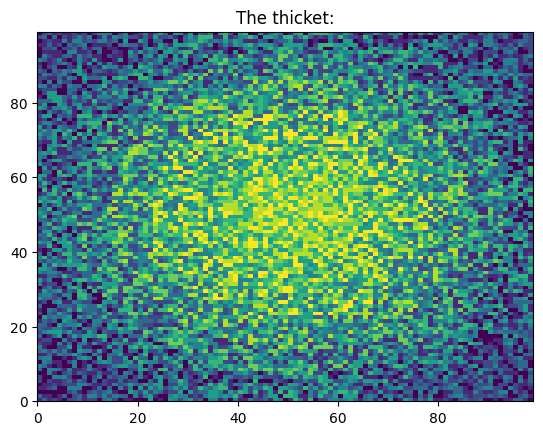

In [14]:
from matplotlib import pyplot as plt
import numpy as np
from utils import parse_from_file, ParseConfig

parser = ParseConfig('\n', ParseConfig('', int))

tree_grid = parse_from_file('day_8.txt', parser)

fig, ax = plt.subplots(1, 1)
ax.pcolormesh(tree_grid)
ax.set_title('The thicket:')

Text(0.5, 1.0, 'this one might be a little obscure')

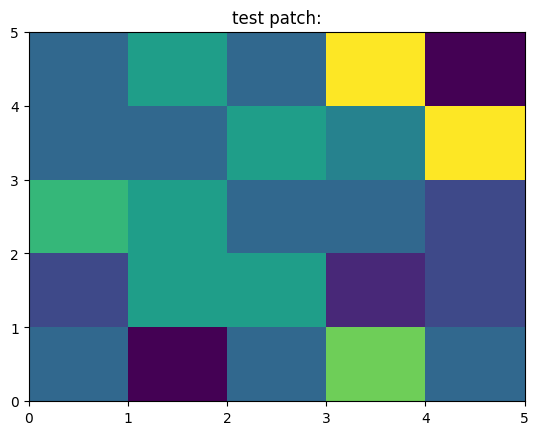

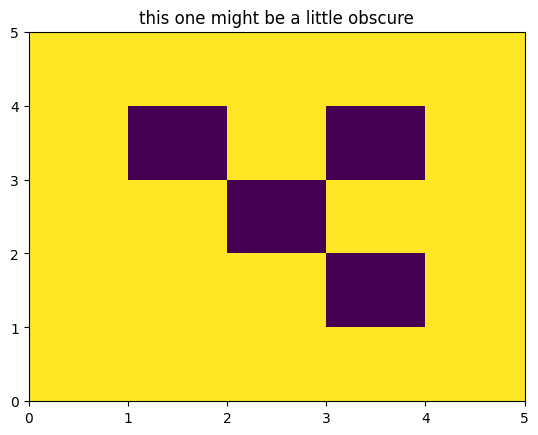

In [15]:
def is_visible(
    row: int, col: int, grid: 'list[list[int]]', t_grid: 'list[list[int]]'
) -> bool:
    """
    returns true if the tree in the specified row/col of the grid can be seen
    from outside from any direction
    """
    # catch the edge cases... geddit??!
    if row * col == 0 or row == len(grid) - 1 or col == len(t_grid) - 1:
        return True
    this_tree = grid[row][col]

    left = all([this_tree > other_tree for other_tree in grid[row][:col]])
    right = all([this_tree > other_tree for other_tree in grid[row][col + 1:]])
    up = all([this_tree > other_tree for other_tree in t_grid[col][:row]])
    down = all([this_tree > other_tree for other_tree in t_grid[col][row + 1:]])

    return left or right or up or down

def visibility_grid(grid: 'list[list[int]]') -> list[list[int]]:
    """
    gets a grid of boolean info on if a tree in that position is visible
    """
    np_grid = np.array(grid)
    np_grid_t = np_grid.transpose()
    visible_grid = []
    for row, _ in enumerate(np_grid):
        visible_grid.append(list())
        for col, _ in enumerate(np_grid_t):
            visible_grid[-1].append(is_visible(row, col, np_grid, np_grid_t))
    
    return visible_grid

test_grid = [
    [3, 0, 3, 7, 3],
    [2, 5, 5, 1, 2],
    [6, 5, 3, 3, 2],
    [3, 3, 5, 4, 9],
    [3, 5, 3, 9, 0],
]

test_visibility = visibility_grid(test_grid)

fig1, ax1 = plt.subplots()
ax1.pcolormesh(test_grid)
ax1.set_title('test patch:')
fig2, ax2 = plt.subplots()
ax2.pcolormesh(test_visibility)
ax2.set_title('this one might be a little obscure')

Text(0.5, 1.0, 'the wood from the tree (-houses)')

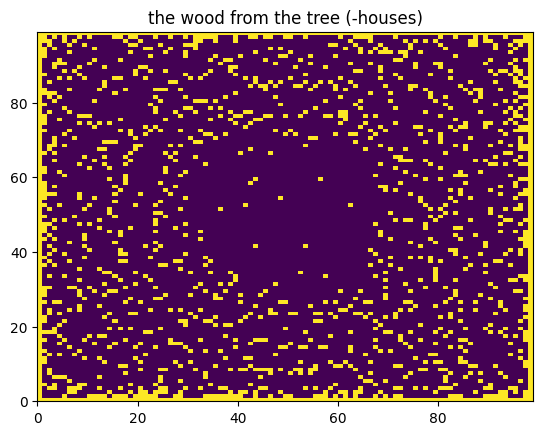

In [16]:
visibility = visibility_grid(tree_grid)

fig, ax = plt.subplots()
ax.pcolormesh(visibility)
ax.set_title('the wood from the tree (-houses)')


In [17]:
total_visible = sum([sum(row) for row in visibility])

print(f'the total number of visible trees is: {total_visible}!')

the total number of visible trees is: 1647!
